**Abstract**. Every quantity that is estimated from data, such as the mean or the variance, is subject to uncertainties of the measurements due to data collection. If a different sample of measurements is collected, value  fluctuations will certainly give rise to a different set of measurements, even if the experiments are performed under the same conditions. The use of different data samples to measure the same value results in a sampling distribution that characterize the quantity in consideration. This distribution is used to characterize the "true" value of the quantity in consideration. This blog post is dedicated to present how the collected data is employed to test hypotheses of the quantity being measured.

Hypothesis testing is the process that establishes whether the measurement of a given quantity, such as the mean, is consistent with respect to another set of observations or a distribution. The process of hypothesis testing requires a considerable amount of care in the definition the hypothesis to test and in drawing conclusions. Hypothesis tests can be divided into two main schools of thought based on Bayesian or Statistical inference. [3]

For a given hypothesis $H$ to be tested, it can be formulated in the following form
* $H_0$ (null hypothesis): The quantity in consideration is no different from the other set
* $H_1$ (alternative hypothesis): The quantity in consideration is different from the other set

In this blog post, I present hypothesis testing using Bayesian and Statistical inferences.

In [2]:
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [3]:
# Matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'font.size': 18})
# plt.rcParams['text.usetex'] = True
# plt.rc('font', family='serif')

# Errors

With respect to hypothesis testing two errors can occur are: 

1. The null hypothesis is true but the decision based on the testing process is that the null hypothesis should be rejected
2. The null hypothesis is false but the testing process concludes that it should be accepted. 

These two errors are called Type I and Type II errors. The probability of a Type I error (denoted by $\alpha$) is also called the significance level of the test (the Type II error is denoted by $\beta$). The next table is analogous to the previous table with the decision reached in hypothesis testing shown in bold along the left margin and the true situation shown in bold along the top margin of the table.


|                | H0 is True   | H0 is False   |
|----------------|--------------|---------------|
| **H0 is accepted** | Correct      | Type II Error |
| **H0 is rejected** | Type I Error | Correct       |


src: [5]

# Bayesian Inference

In this framework, the problem is formulated as follows: The goal is to calculate the conditional probability for a hypothesis being true, given a certain outcome of an experiment or measurement

\begin{equation}\label{eq:Bayesian_hyp_test}
P(H_0|O)=\dfrac{P(O|H_0)P(H_0)}{P(O)}
\end{equation}

where
* $P(H_0)$ is the prior probability of the null hypothesis be true
* $P(H_1)$ is the prior probability of the alternative hypothesis be true
* $P(H_0|O)$ (respectively, $P(H_1|o)$) is the probability of the null (respectively, alternative) hypothesis be true given the outcome

By fixing a _critical value_ $\alpha$, one either can verify whether the probability of the hypothesis $P(H_0|O)$ is higher or smaller than $\alpha$. Then, one accepts the hypothesis if $P(H_0|O)\geq\alpha$.

**Example**. Consider a coin that has been tossed 100 times. Given that number of tails is 70, is this coin fair?

Assumptions: 

* Only two outcomes are possible: heads or tails
* Coin toss does not affect other tosses, i.e. coin tosses are independent of each other. 
* All coin tosses come from the same distribution. 

Thus, the random variable coin toss is an example of an iid variable. Under these assumptions the selected likelihood is the binomial distribution:

$$ P(y|\theta, N)=\dfrac{N!}{y!(N-y)!}\theta^y(1-\theta)^{N-y}\;, $$
where
* $y$ is the number of tails
* $\theta$ proportion of tails
* $N$ is the number of tosses

The hypothesis to be tested is the following:
* $H_0$: $\theta=0.5$
* $H_1$: $\theta\neq0.5$

Under this hypothesis formulation, let the observations be the parameters $y$ and $N$, the conditional probabilities are given by
* $ P(H_0|O) = P(\theta=0.5|N=100,y=70)$
* $ P(H_1|O) = P(\theta\neq0.5|N=100,y=70)$

The conditional probability of $\theta$ is calculated as
\begin{equation}\tag{2}
P(\theta|N,y) = \dfrac{P(y|\theta,N)P(\theta)}{\displaystyle\int_0^1 P(y|\theta,N)P(\theta)\,d\theta}
\end{equation}

The prior distribution is chosen as the beta distribution

$$ P(\theta)=\dfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\;, $$
where
* $\Gamma$ is the gamma function
* $\alpha$ and $\beta$ are parameters

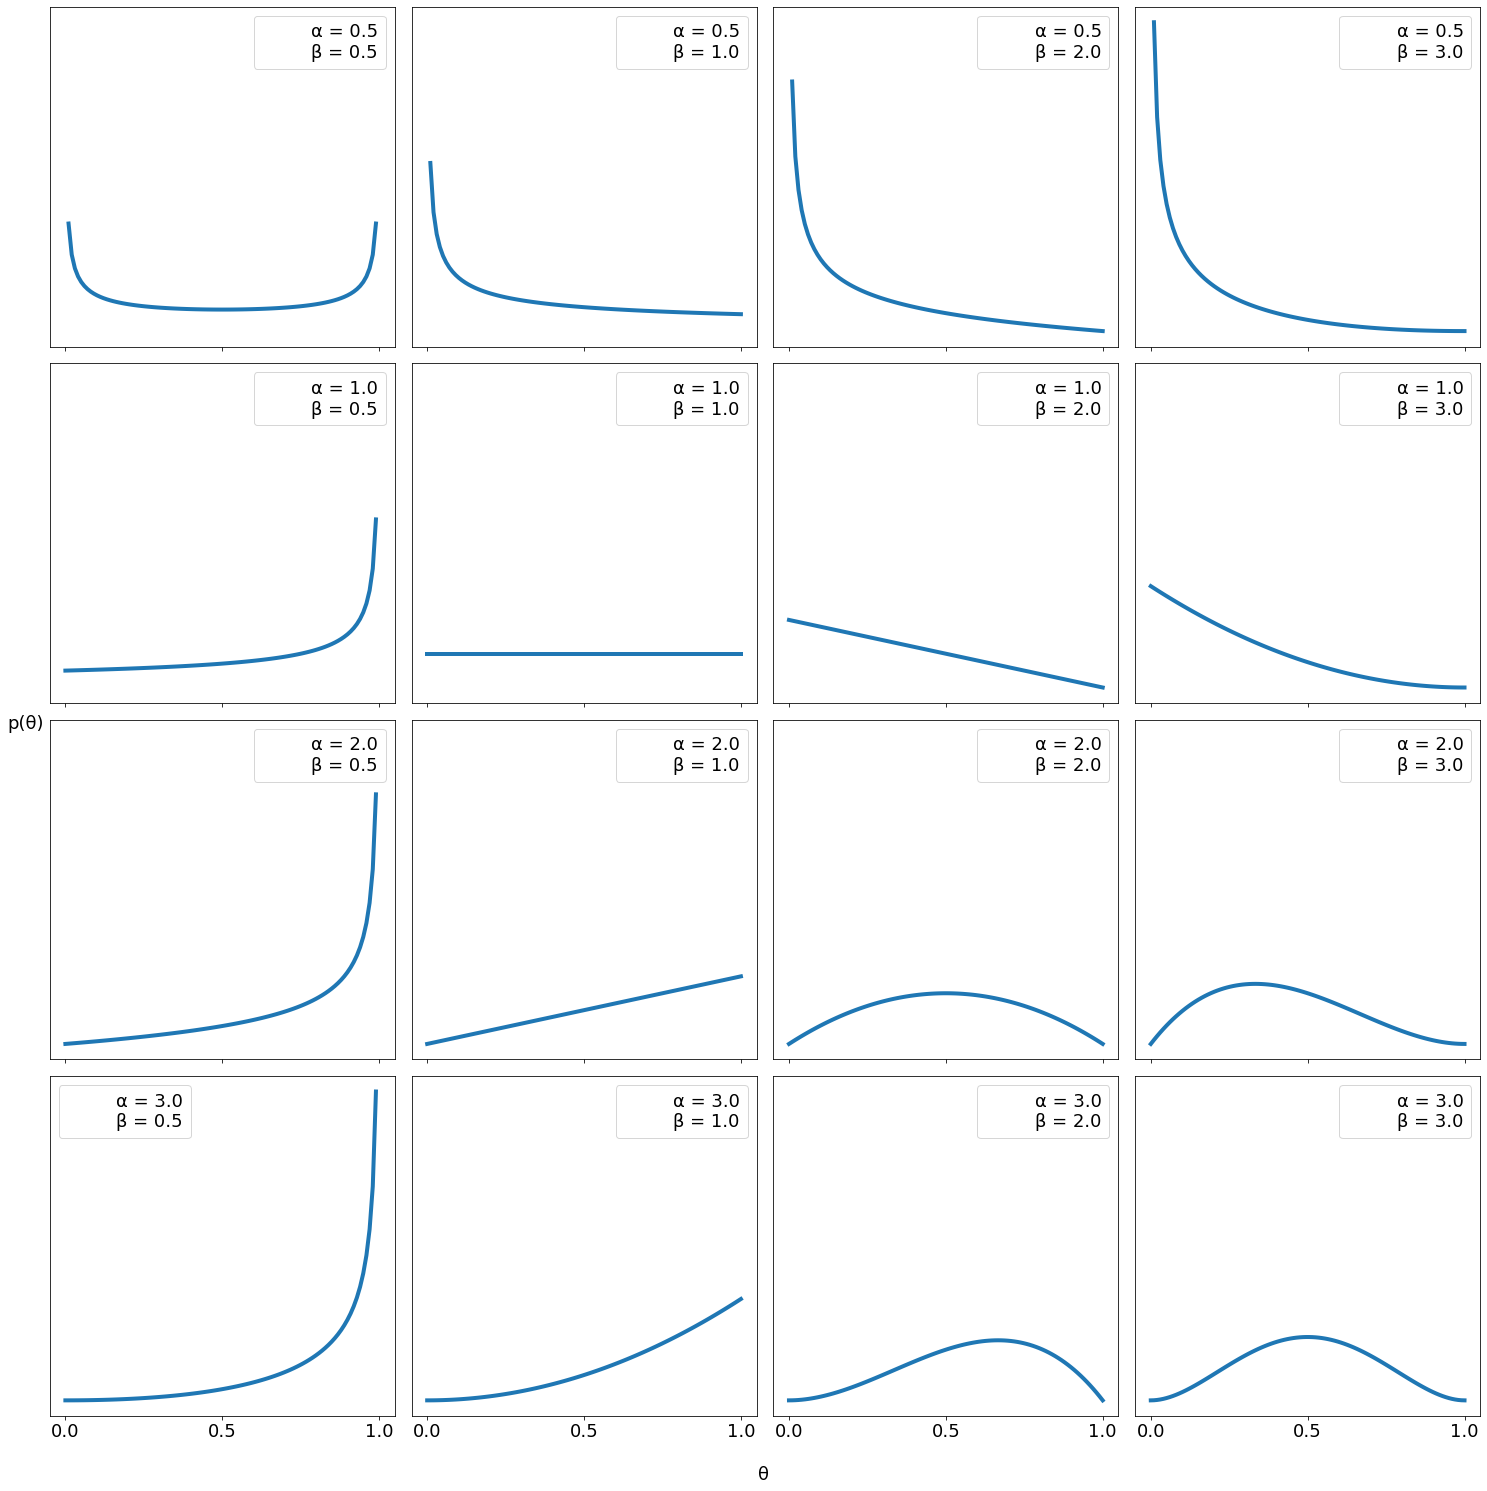

In [14]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(20, 20), constrained_layout=True)
for i in range(4):
   for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x) 
        ax[i,j].plot(x, y, linewidth=4)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b), alpha=0)
        ax[i,j].legend() 
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, -0.025, 'θ', ha='center')
f.text(-0.025, 0.5, 'p(θ)', ha='left', va='center', rotation=0)
plt.savefig("prior_distribution.svg")

The posterior probability is
$$ P(\theta|N,y)=\dfrac{\theta^{y+\alpha-1}(1-\theta)^{N-y+\beta-1}}{\displaystyle \int_0^1\theta^{y+\alpha-1}(1-\theta)^{N-y+\beta-1}\;d\theta} $$

By letting $\alpha=\beta=1$, the prior distribution becomes a uniform distribution, and the probability of $\theta=0.5$ is upper bounded by
$$ P(0.49\leq\theta\leq0.51|N=100,y=30)=\dfrac{\displaystyle\int_{0.49}^{0.51}\theta^{30}(1-\theta)^{70}\;d\theta}{\displaystyle\int_0^1\theta^{30}(1-\theta)^{70}\;d\theta} \;=5.158837081428554\times10^{-5}\;.$$

In [24]:
print(f"The probability of the null hypothesis is: {integrate.quad(lambda theta: theta**30*(1-theta)**70, 0.49, 0.51)[0] / integrate.quad(lambda theta: theta**30*(1-theta)**70, 0, 1)[0]}")

The probability of the null hypothesis is: 5.158837081428554e-05


Consequently, the probability of the null hypothesis is less than 50%. Hence, hypothesis $H_0$ is rejected.

# Statistical Inference

From the statistical inference viewpoint, hypothesis testing is the process that establishes whether the measurement of a given statistic, such as the sample mean, is consistent with its theoretical distribution. The process of hypothesis testing requires a considerable amount of care in the definition the hypothesis to test and in drawing conclusions.

Let $f:E\times\mathbb{R}^n\to\mathbb{R}$ be a probability distribution function. Every hypothesis consists of an assumption about the parameter $\lambda$ of the distribution $x\mapsto f(x, \lambda)$.

The null hypothesis $H_0$ is made with respect to the parameter $\lambda$ and formulated as
$$ H_0: \lambda=\lambda_0\;,$$
for a given $\lambda_0\in\mathbb{R}^n$. The alternative hypothesis is given as
$$ H_1: \lambda\neq\lambda_0\;. $$

Since the null hypothesis makes a statement about the probability density in the sample space, it also predicts the probability for observing a point $X$. This probability is used to define the critical region $S_c$ with a significance level $\alpha\in(0,1)$ as
$$ P(X\in S_c|H_0)=\alpha\;. $$

In other words, $S_c$ is defined as the probability to observe a point $X$ within $S_c$ equals to $α$, under the assumption that $H_0$ is true. If the point $X$ from the sample actually falls into the region $S_c$, then the hypothesis $H_0$ is rejected. Note that this equation does not define the critical region $S_c$ uniquely.

In practice, the set $E$ is not available due to the lack of knowledge of the population. Instead one constructs a test statistic $T(X)$ and determines a region $U$ of the variable $T$ that corresponds to the critical region $S_c$, i.e., $X\mapsto T(X), S_c(X)\mapsto U(X)$.

The null hypothesis is rejected, whenever $T\in U$

The process can be summarized in three steps.

1. Determine the statistics to use for the null hypothesis. The choice of statistic means that we are in a position to use the theoretical distribution function for that statistic to tell whether the actual measurements are consistent with its expected distribution, according to the null hypothesis.

2. Determine the probability or confidence level for the agreement between the statistic and its expected distribution under the null hypothesis. This confidence level defines a range of values for statistics that are consistent with its expected distribution. This range is called *acceptable region* for the statistic. Values of the statistics outside of the acceptable range define the *rejection region*.

3. At this point two cases are possible:

    3.1. The measure value of the statistic $S$ falls into the rejection region. This means that the distribution function of the statistic of interest, under the null hypothesis, does not allow the measured value at the confidence level $p$. In this case the null hypothesis must be rejected at the stated confidence level $p$. 
    
    3.2. The measured value of the statistic $S$ is within the acceptable region. In that case the null hypothesis cannot be rejected. Sometimes this situation can be referred to as the null hypothesis being acceptable. This is, however, not the same as stating that the null hypothesis is the correct hypothesis and that the null hypothesis is accepted. In fact, there could be other hypotheses that could be acceptable and one cannot be certain that the null hypothesis tested represents the parent model for the data.

In [2]:
# Todo:
# * Explain confidence level

The following is from [2]

Related reading: Neyman–Pearson Lemma

## F-Test on Equality of Variances

## Student's Test: Comparison of Means

## The P-Value Approach to Hypothesis Testing

In the previous examples, a critical value was used in each of the situations in which a coin was tested for fairness.  Although it was not explained how the critical value was selected in those examples, the critical value is usually chosen so that the test will have a small probability of Type I error.  The values usually used for alpha, the probability of a Type I error, are 0.10, 0.05, or 0.01.  Recall that alpha is also called the significance level.  These are called 10%, 5%, or 1%, respectively, significance levels.

In the p-value approach neither a significance level nor a critical value are determined before the experiment is carried out or the sample taken.  The null and alternative hypotheses are stated, and the experiment is run.  A statistic is computed from the outcome of the experiment--the p-value is the probability of the observed outcome or something more extreme than the observed outcome, computed under the assumption that the null hypothesis is true.  The determination of an outcome being more extreme than the observed outcome is based on the null and alternative hypotheses.  Examples of this will be shown later.

For now, go back to the coin tossing experiment where the null hypothesis is that the coin is fair (p=0.5) and the alternative hypothesis is that the coin is biased in favor of heads (p>0.5).  Suppose the coin is tossed 10 times and 8 heads are observed.  Since the alternative hypothesis is p>0.5, more extreme values are numbers of heads closer to 10.  So, to compute the p-value in this situation, you need only compute the probability of 8 or more heads in 10 tosses assuming the coin is fair.  But, the number of heads in 10 tosses of a coin assuming that the coin is fair has a binomial distribution with n=10 and p=0.5.  The p-value is P[8 heads] + P[9 heads] + P[10 heads].  From the binomial probability distribution, P[8 heads]=0.044, P[9 heads]=0.01, and P[10 heads]=0.001.  Thus the p-value is 0.044+0.010+0.001=0.055.

Now that the p-value is computed, how do you decide whether to accept or reject the null hypothesis?  Since the p-value is simply the probability of getting the observed number of heads under the assumption that the null hypothesis is true, if this probability is small, it is unlikely that the null hypothesis is true.  So 'small' p-values lead to rejection of the null hypothesis.  But 'small' is not defined.  The definition of small is up to the reader--if in the opinion of the reader, the p-value is small, the null hypothesis is rejected, while larger values would cause the null hypothesis to be accepted.  In statistical practice, 'small' values are usually 0.10, 0.05, or 0.01.  In the coin tosses above, the p-value is 0.055, and if a 'small' p-value for you is 0.05, you would fail to reject the null hypothesis, that is, you would say 8 heads in 10 tosses is not enough evidence to conclude that the coin is not fair.

In [1]:
src: [5]

# Errors

Because of the statistical nature of the sample, it is clearly possible that the null hypothesis could be true, even though it was rejected since $X \in S_c$. The probability for such an error, an error of the first kind, is equal to $\alpha$.

There is in addition another possibility to make a wrong decision, if one does not reject the hypothesis $H_0$ because $X$ was not in the critical region $S_c$, even though the hypothesis was actually false and an alternative hypothesis was true. This is an error of the second kind. The probability for this,
$$P(X\notin S_c|H_1)=\beta$$

This connection with the alternative hypothesis $H_1$ provides us with a method to specify the critical region $S_c$. A test is clearly most reasonable if for a given significance level $\alpha$ the critical region is chosen such that the probability $\beta$ for an error of the second kind is a minimum. The critical region and therefore the test itself naturally depend on the alternative hypothesis under consideration.

Once the critical region has been determined, we can consider the probability for rejecting the null hypothesis as a function of the ``true'' hypothesis, or rather as a function of the parameters that describe it. 
$$ M(S_c,\lambda)=P(X\in S_c|H)=P(X\in S_c|\lambda)$$

# Import

## Modules

# References

[1] M. Bonamente, "Statistics and Analysis of Scientific Data", Springer, 2017

[2] S. Brandt, "Data Analysis", Springer, 2014

[3] L.-G. Johansson, "Philosophy of Science for Scientists", Springer 2016

[4] https://stats.stackexchange.com/questions/364003/testing-if-a-coin-is-fair-using-bayesian-statistics

[5] https://www.csus.edu/indiv/j/jgehrman/courses/stat50/hypthesistests/9hyptest.htm